### <span style = 'color:green'> Creating a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**




In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
df = pd.read_csv('SVM.csv')

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [4]:
# Firstly looking onto names of columns are very large we can give some short name for easy access
df.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

In [5]:
# Datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      17898 non-null  float64
 1   std_profile       17898 non-null  float64
 2   kurtosis_profile  15396 non-null  float64
 3   skewness_profile  17898 non-null  float64
 4   mean_dmsnr        17898 non-null  float64
 5   std_dmsnr         16196 non-null  float64
 6   kurtosis_dmsnr    17898 non-null  float64
 7   skewness_dmsnr    17029 non-null  float64
 8   target            12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
# Finding No of null values
df.isna().sum()

mean_profile           0
std_profile            0
kurtosis_profile    2502
skewness_profile       0
mean_dmsnr             0
std_dmsnr           1702
kurtosis_dmsnr         0
skewness_dmsnr       869
target              5370
dtype: int64

In [7]:
# Finding Percentage of null values to determine further step to delete or impute it.
df.isnull().sum()/len(df) * 100

mean_profile         0.000000
std_profile          0.000000
kurtosis_profile    13.979216
skewness_profile     0.000000
mean_dmsnr           0.000000
std_dmsnr            9.509442
kurtosis_dmsnr       0.000000
skewness_dmsnr       4.855291
target              30.003352
dtype: float64

In [8]:
# Here target column is also having nul values, so we need to drop those rows.
# For rest of other columns percentage of null values is high so, we cannot drop the rows, rather we can impute it.

In [9]:
# Statistical inference of Data
df.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [10]:
# Generally we fill the missing values with mean/median/mode, but we can use that thing is percentage of null value is less.
# Here percentage of null values are very high so, if we use mean, than there high possibility that distribution will become high kurtosis.
# To avoid that, We will impute the missing data by randomly choosing the values from the column itself
df['kurtosis_profile'].fillna(pd.Series(np.random.choice(df["kurtosis_profile"],size = len(df.index))), inplace =True)
df["std_dmsnr"].fillna(pd.Series(np.random.choice(df["std_dmsnr"],size = len(df.index))), inplace =True)
df["skewness_dmsnr"].fillna(pd.Series(np.random.choice(df["skewness_dmsnr"],size = len(df.index))), inplace =True)

In [11]:
# in randomly choosing values some values can also be imputed as null, which we can clearly see below
df.isna().sum()

mean_profile           0
std_profile            0
kurtosis_profile     359
skewness_profile       0
mean_dmsnr             0
std_dmsnr            161
kurtosis_dmsnr         0
skewness_dmsnr        44
target              5370
dtype: int64

In [12]:
# drop the remaining rows
df =df.dropna().reset_index(drop=True)

In [13]:
df.isna().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

In [14]:
# create a list of continuous features for further computation
# Since all dtypes are float or int, no categorical features
continuous_features = list(set(df.columns) - set(['target']))
continuous_features.sort()
continuous_features

['kurtosis_dmsnr',
 'kurtosis_profile',
 'mean_dmsnr',
 'mean_profile',
 'skewness_dmsnr',
 'skewness_profile',
 'std_dmsnr',
 'std_profile']

In [15]:
# fig, axes = plt.subplots(nrows=len(continuous_features),ncols=2,  figsize=(15, 40))
# for i in range(len(continuous_features)):
#     feature = continuous_features[i]
#     plt.figure(figsize = (5, 5))
#     sns.histplot(x=df[feature], ax=axes[i][0])
#     sns.boxplot(x=df[feature], ax=axes[i][1]);

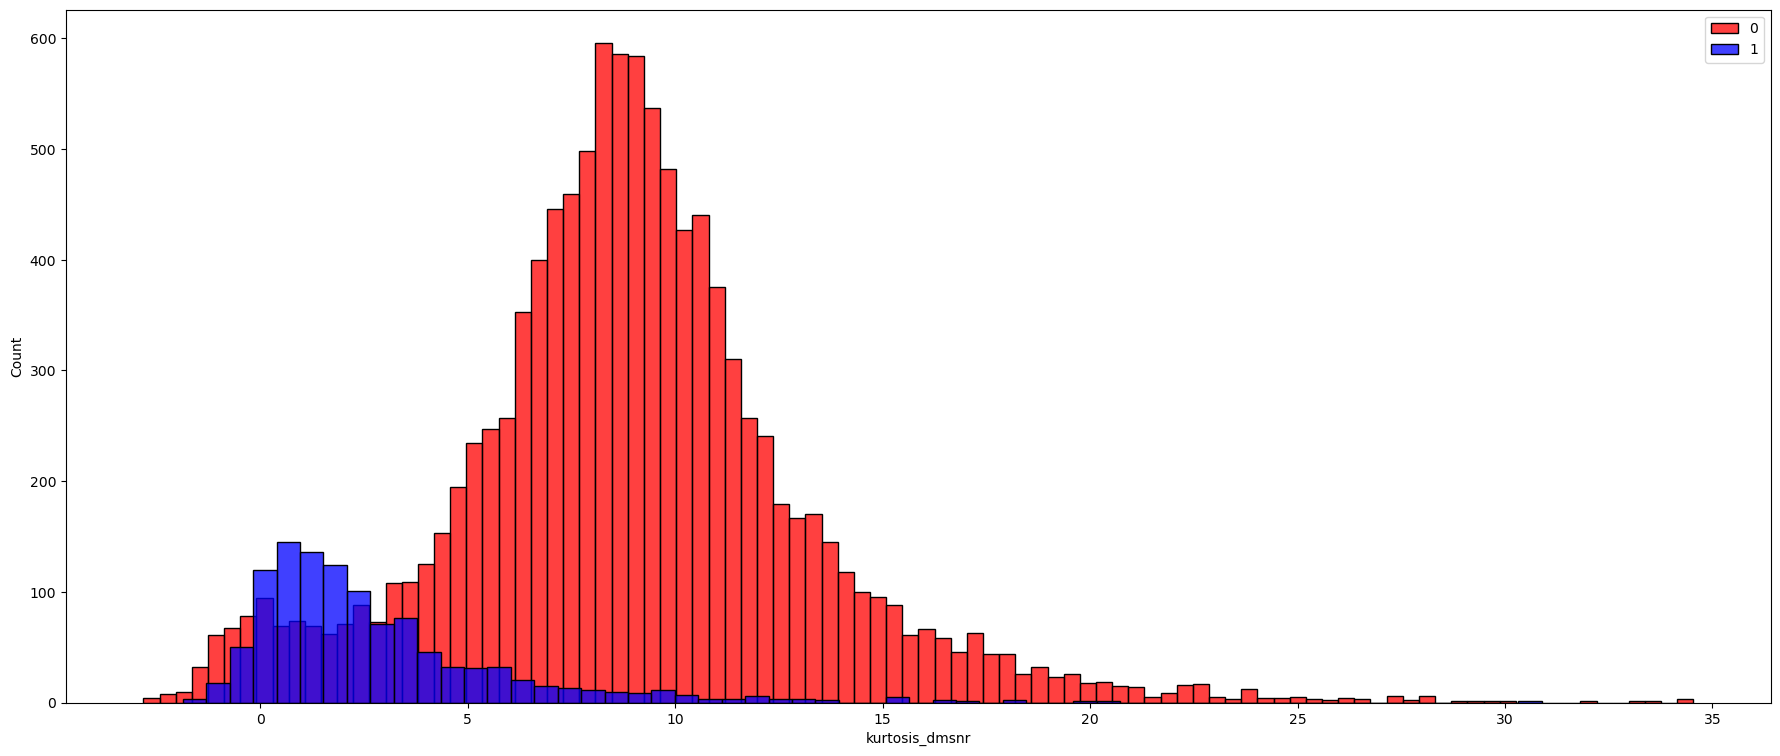

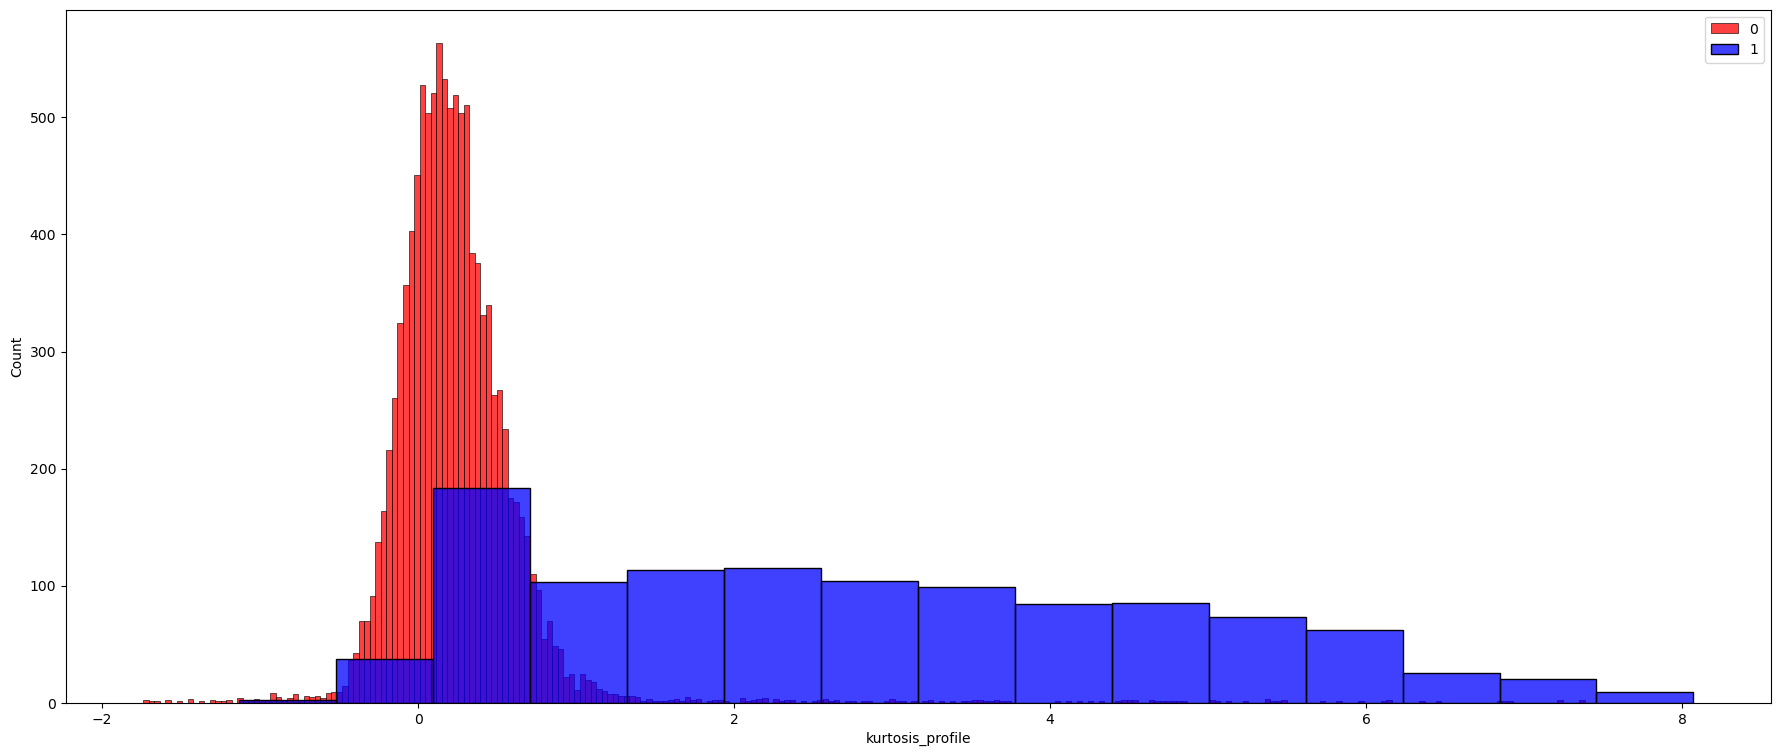

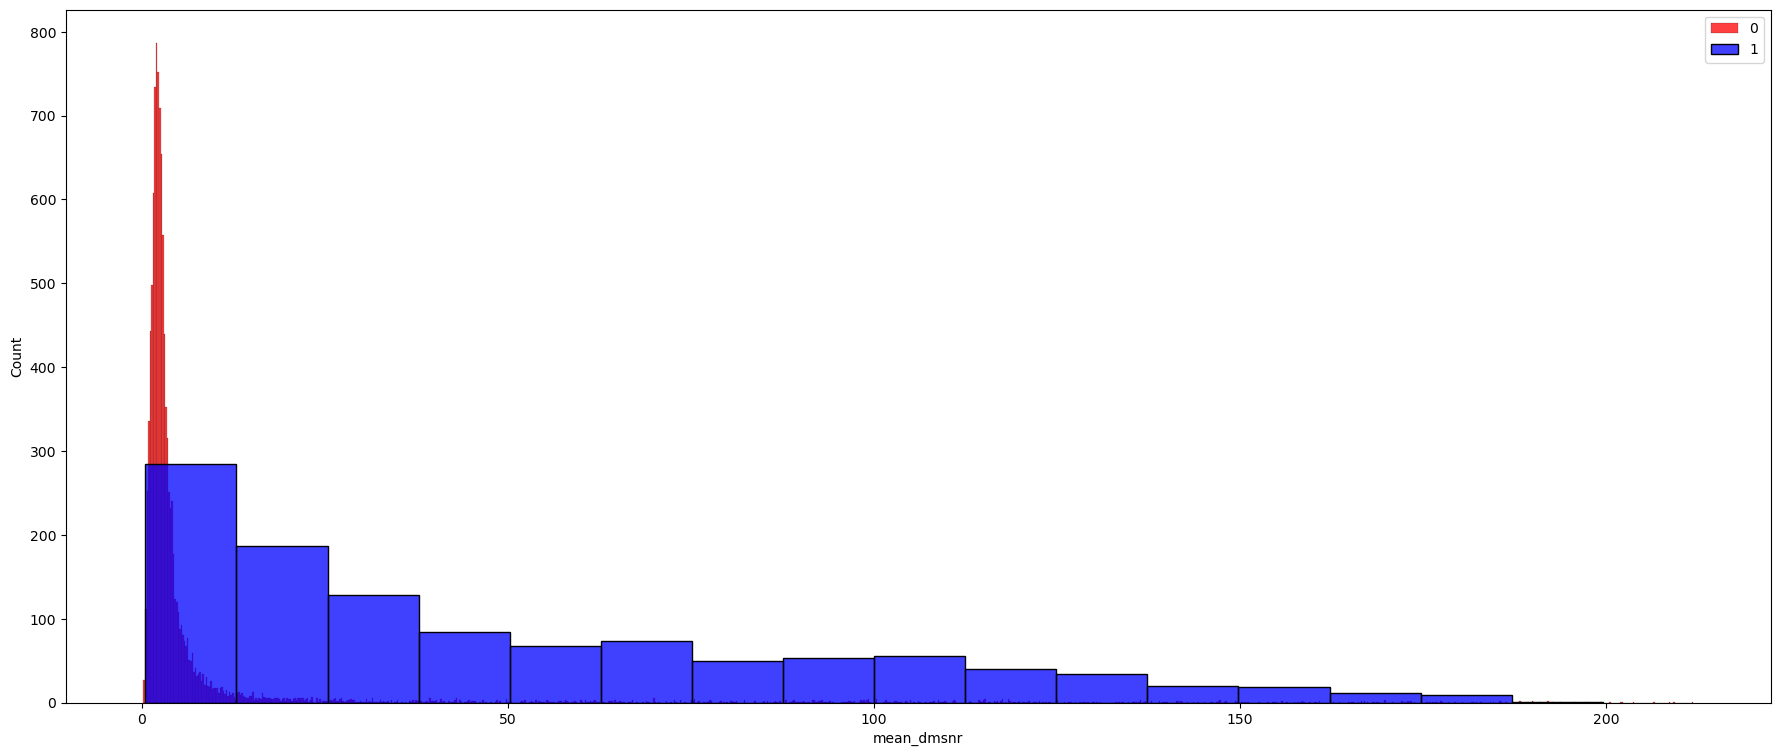

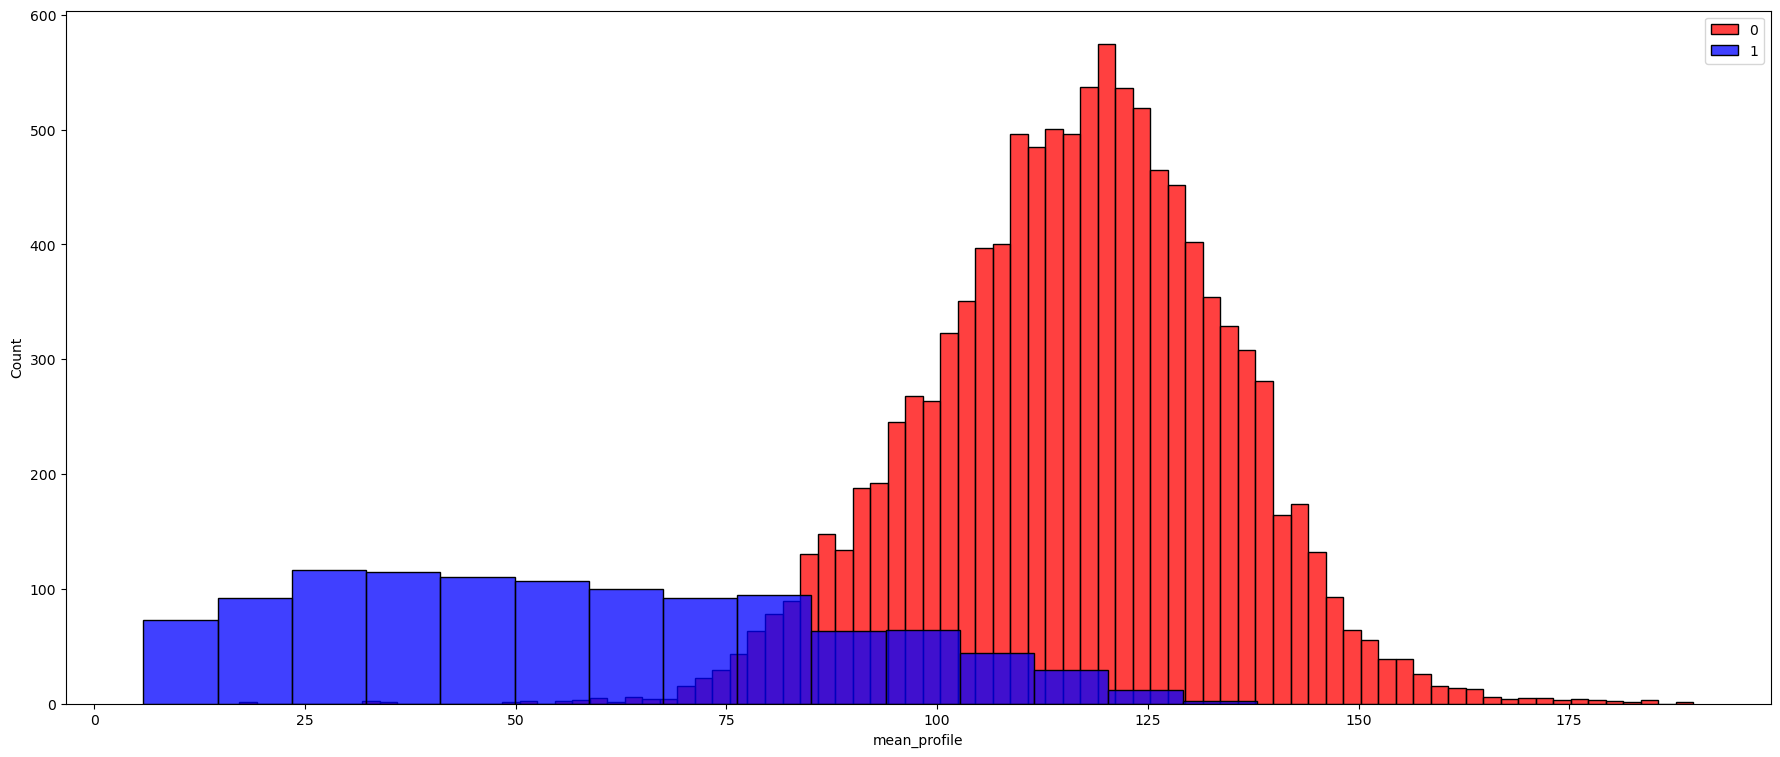

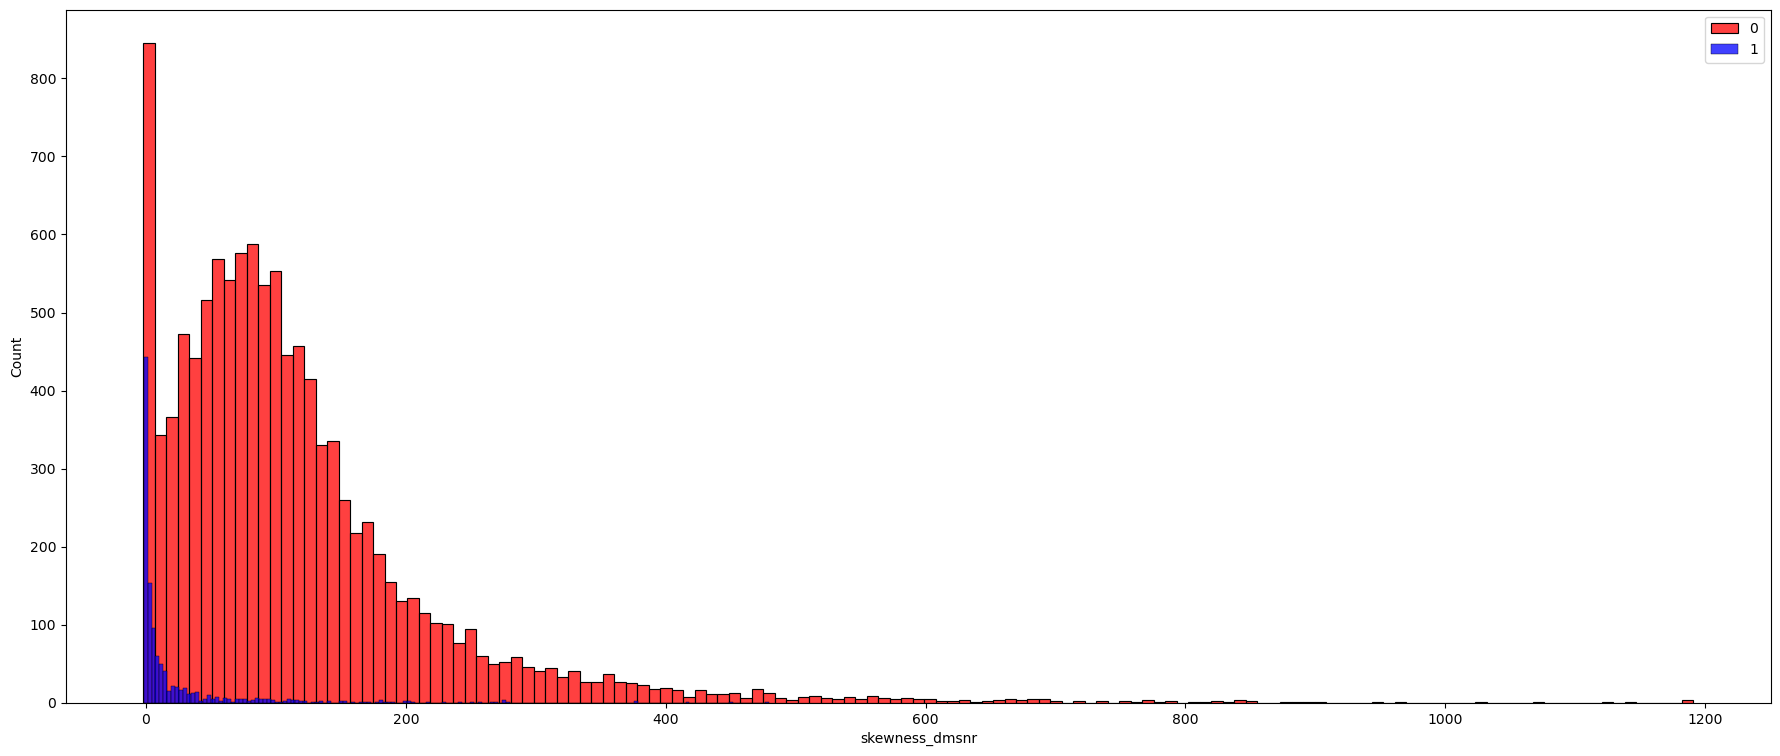

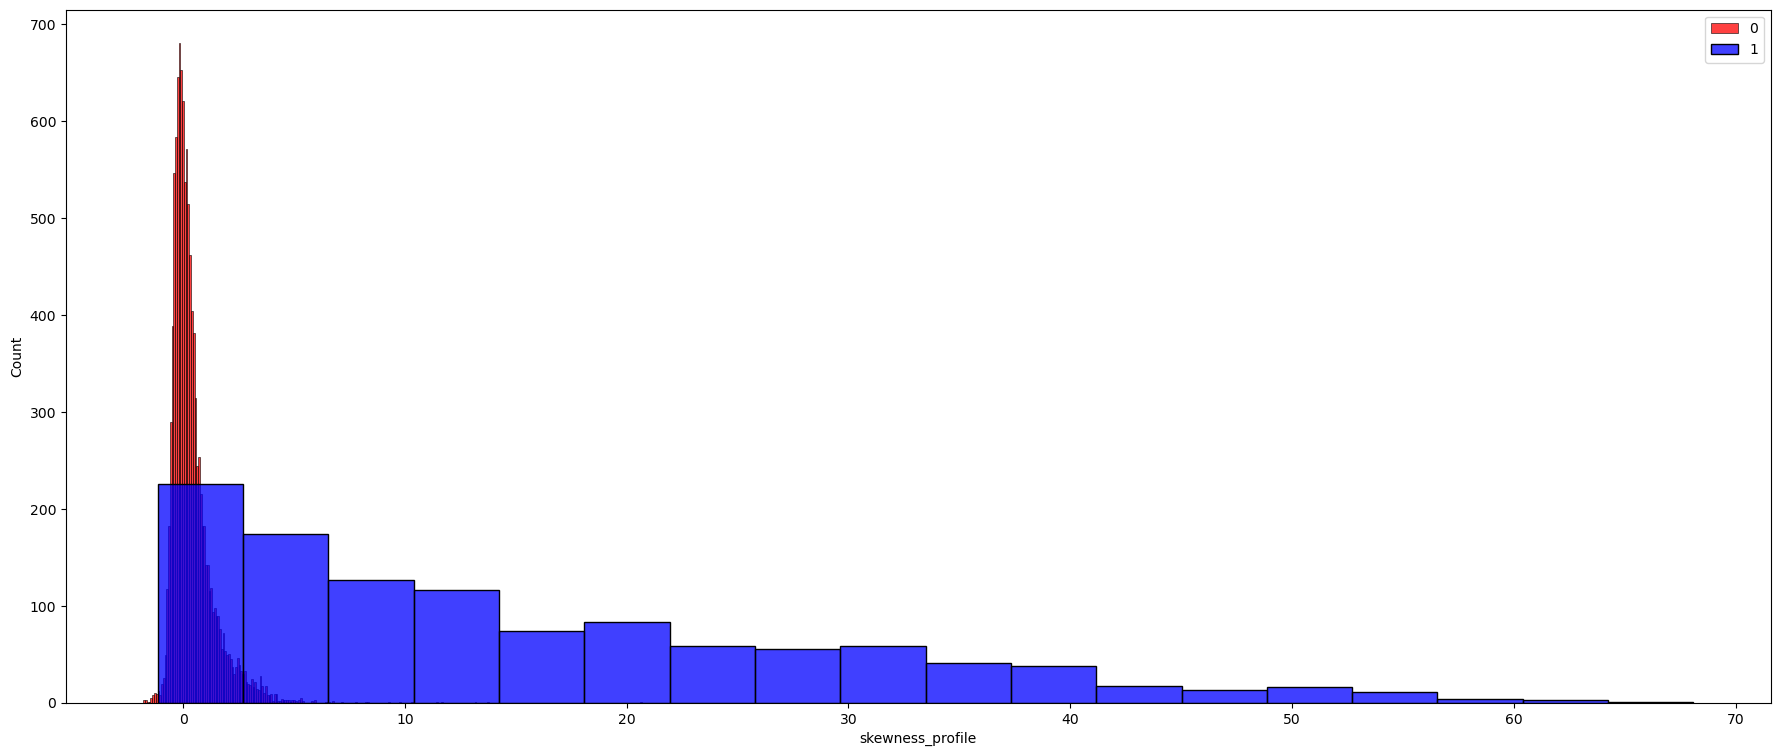

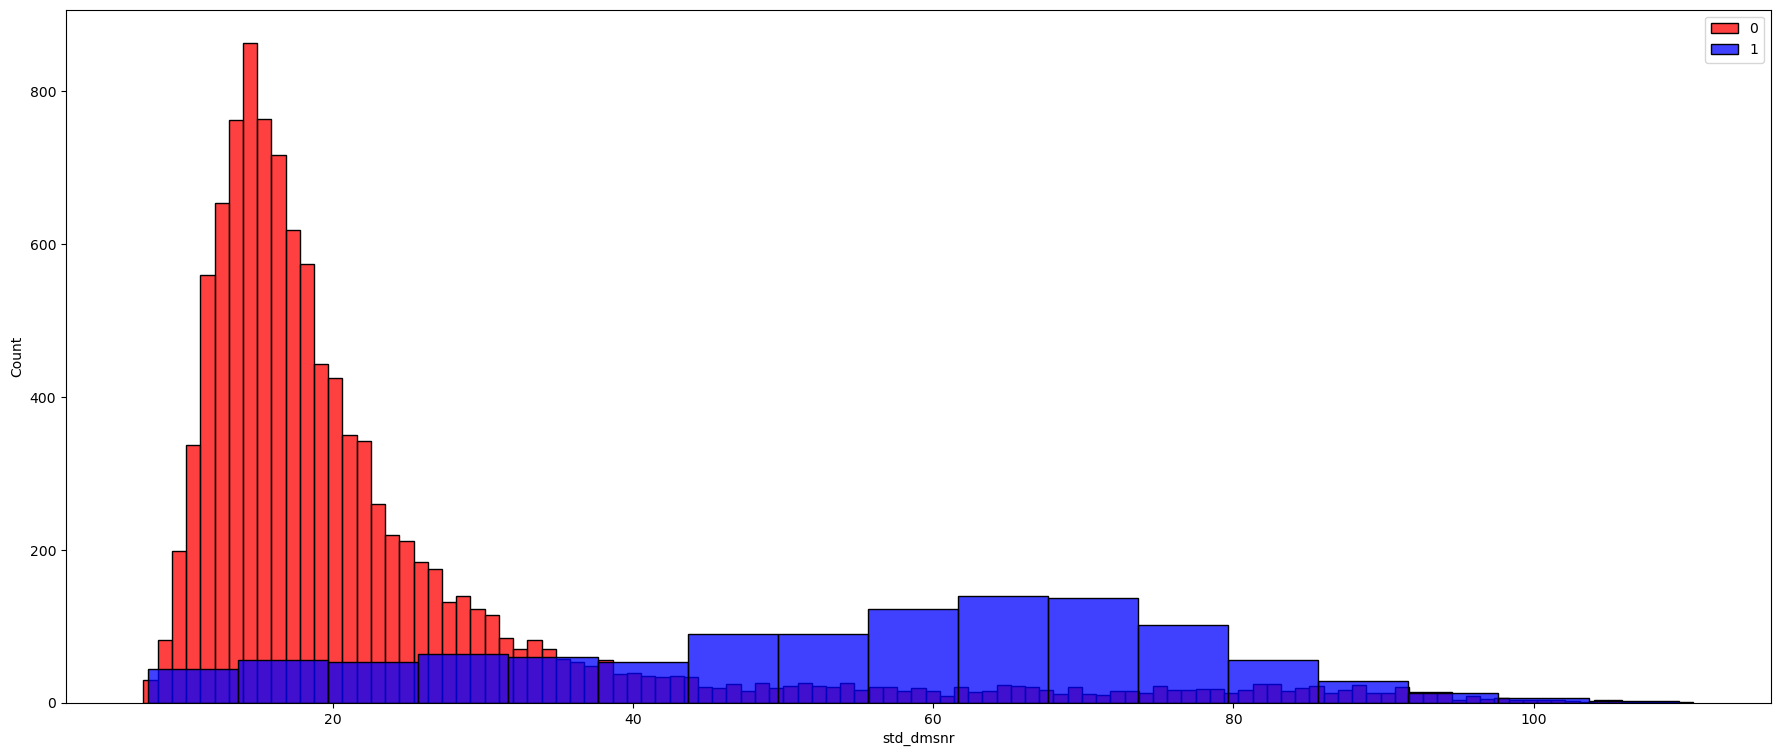

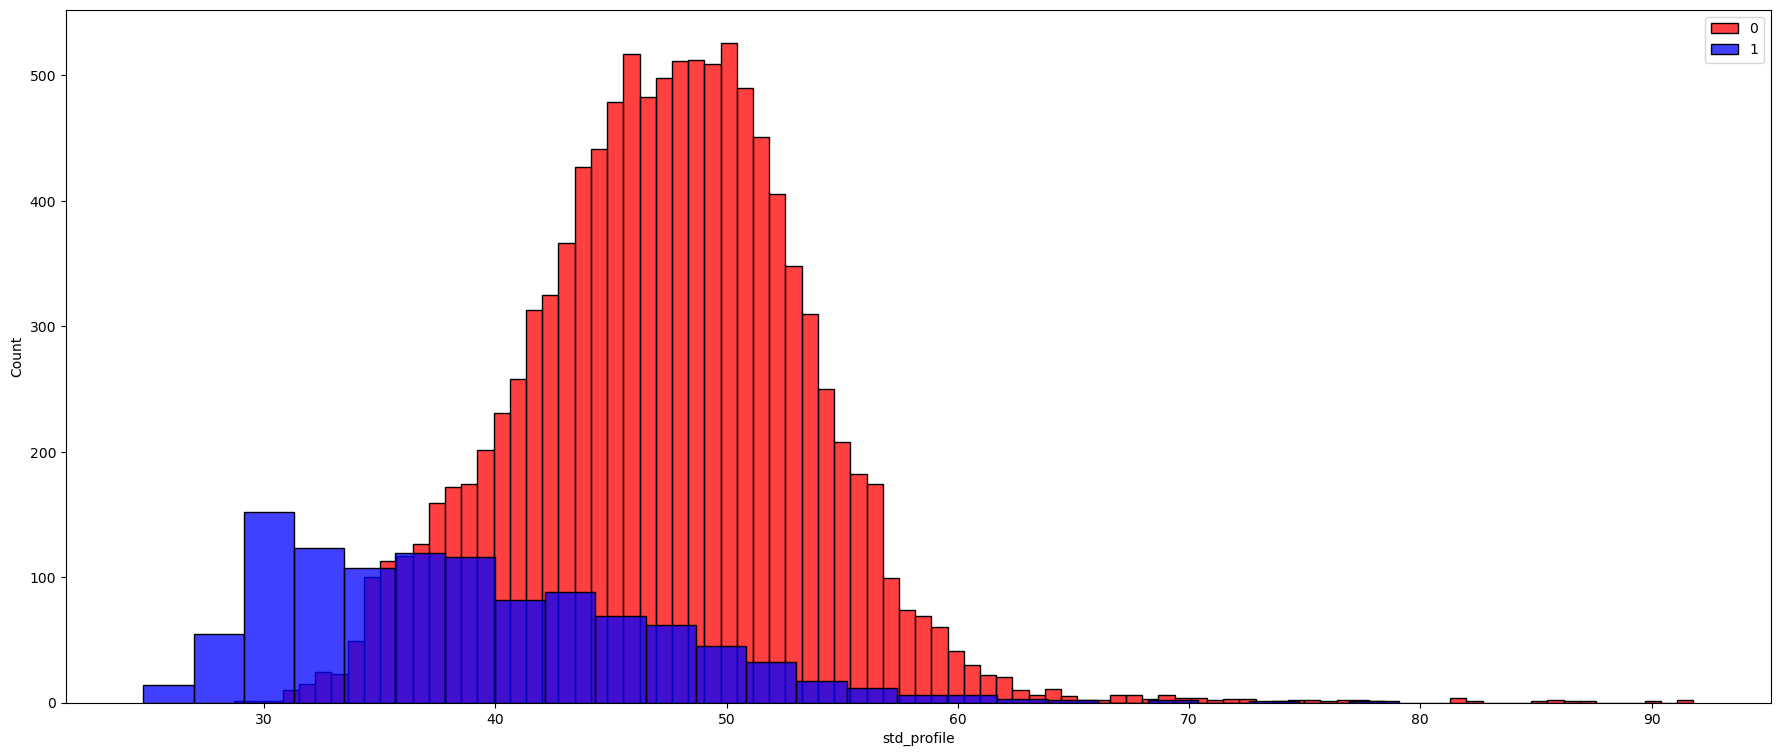

In [16]:
for feature in continuous_features:
    fig,axs = plt.subplots(figsize=(22,9))
    sns.histplot(df[df['target']==0][feature],color = 'red')
    sns.histplot(df[df['target']==1][feature],color = 'blue')
    
    plt.legend([0,1],loc='upper right')
    plt.show()

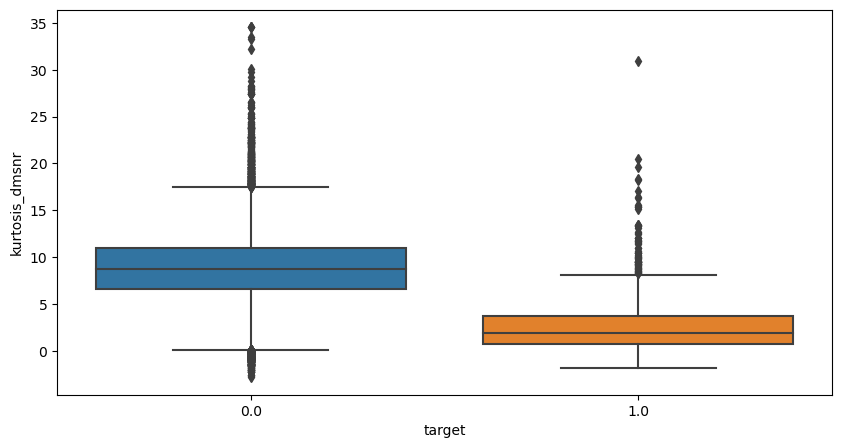

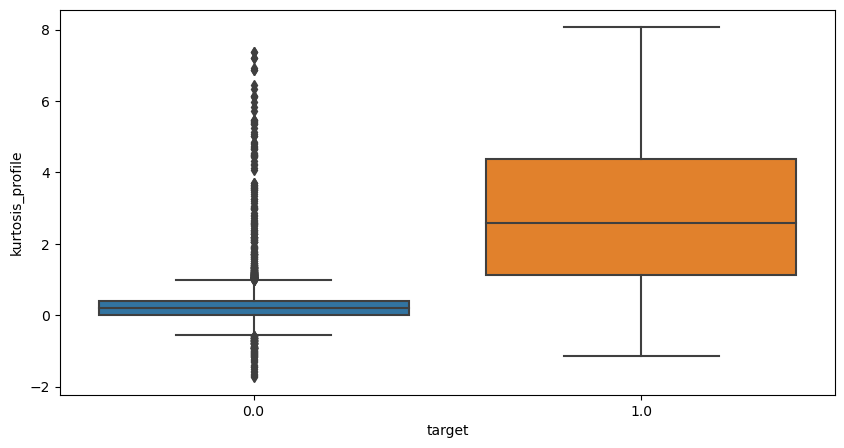

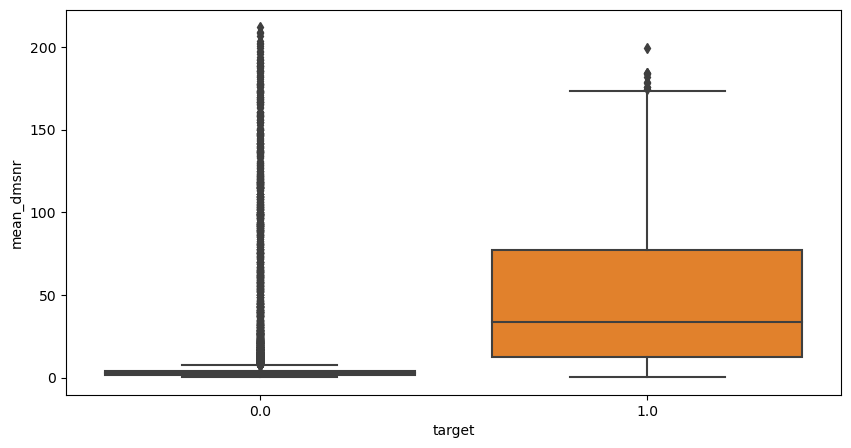

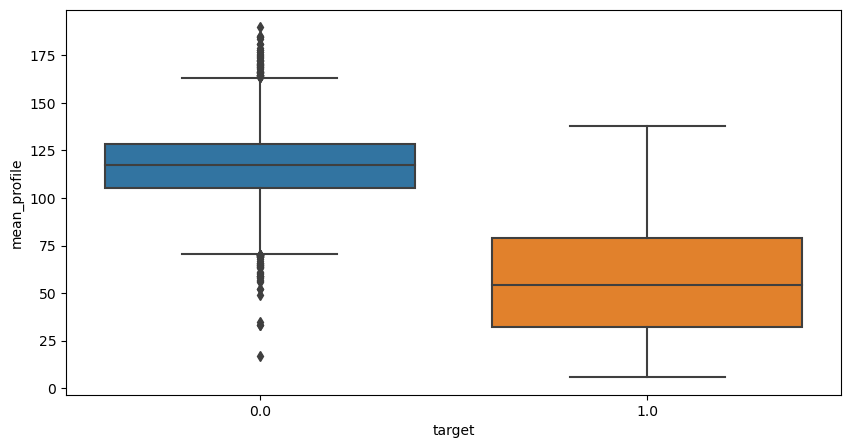

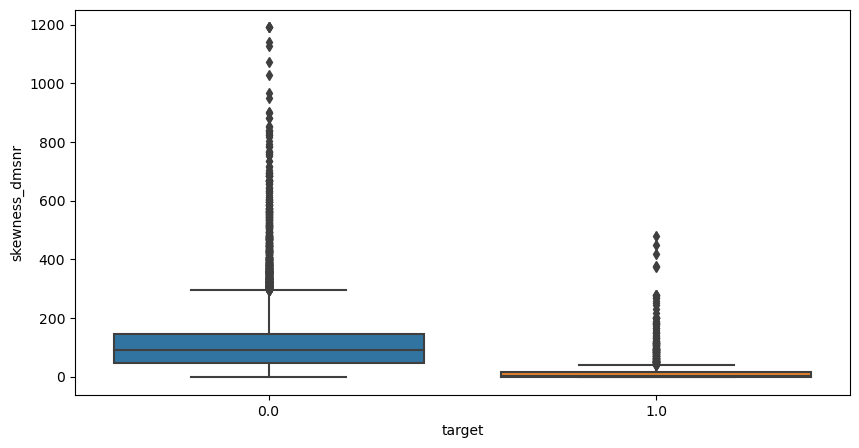

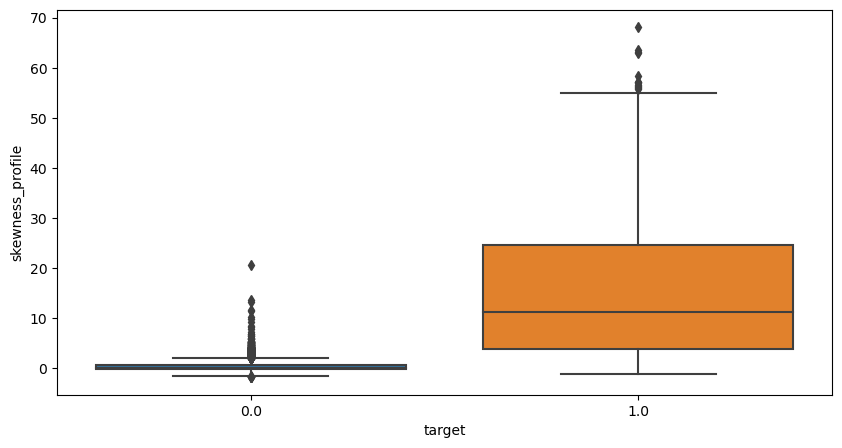

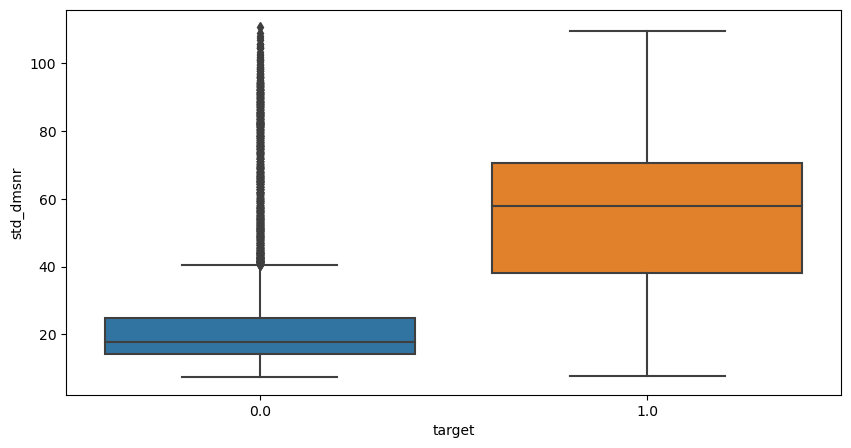

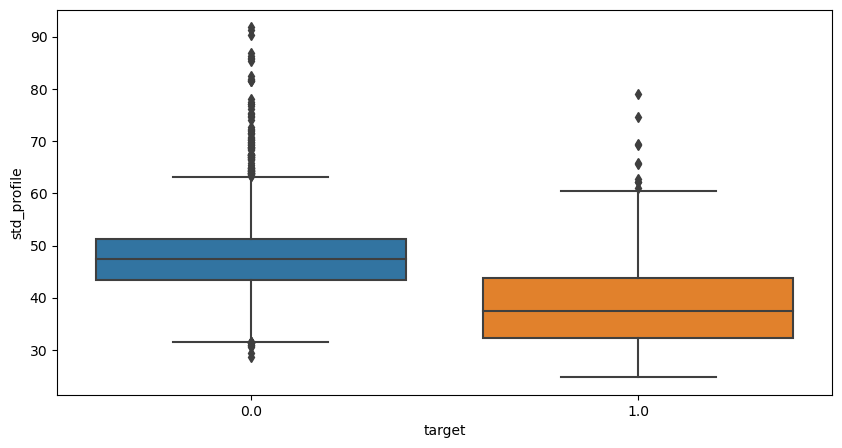

In [17]:
for i in range(len(continuous_features)):
    feature = continuous_features[i]
    plt.figure(figsize = (10, 5))
    sns.boxplot(x='target',y=continuous_features[i],data=df);

- **kurtosis_dmsnr,kurtosis_profile,mean_dmsnr,mean_profile,skewness_profile,std_dmsnr,std_profile** plots quiet a bit says that there is difference in mean of both targets and in distribution.


- Which means that outliers in these features are good condidates for being an **Pulsar Star**

In [18]:
# Now as per box plot we see that for some features have quiet a bit variation in mean for target of 0 and 1 
# But to compare the means of both stage we need perform statistical test.

# Here by we have performed T-test to compare the mean
import scipy.stats as stats

for feature in continuous_features:
    print('---------------------------------')
    print('T-Test for::',feature)
    
    statt,p=stats.ttest_ind(df[feature][df['target'] == 0],
                    df[feature][df['target'] == 1])
    
    if p<.05:
        result="Mean value of for both target Condition is different"  
    else:
        result="Mean value of for both target Condition is same"  
    print('--> P-value is',p,"\n-->",result,"\n")


---------------------------------
T-Test for:: kurtosis_dmsnr
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: kurtosis_profile
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: mean_dmsnr
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: mean_profile
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: skewness_dmsnr
--> P-value is 2.6116703978863337e-174 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: skewness_profile
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: std_dmsnr
--> P-value is 0.0 
--> Mean value of for both target Condition is different 



- Hereby we got that all feature values have different mean so, outliers in all can be a good indicator of **Pulsar Star**

# Outlier Detection

In [19]:
# - As seen in the Box Plot there are many outliers in data which need to be treated well for better performance of the data

In [20]:
# Function for determinig the limits of outliers
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [21]:
# Using for loop to get the value of percentage of outliers and limit for each column
for col in continuous_features:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: kurtosis_dmsnr
Upper Limit = 18.125238975625003
Lower Limit = -1.5979040793750015
Percentage of Outliers= 2.7379185221837377
-------------------------------------------------- 

--------------------------------------------------
Column: kurtosis_profile
Upper Limit = 1.143883930875
Lower Limit = -0.6454412001250001
Percentage of Outliers= 9.030183077684315
-------------------------------------------------- 

--------------------------------------------------
Column: mean_dmsnr
Upper Limit = 10.681542643125
Lower Limit = -3.3544105358750005
Percentage of Outliers= 16.32855022266205
-------------------------------------------------- 

--------------------------------------------------
Column: mean_profile
Upper Limit = 166.6416015625
Lower Limit = 61.4619140625
Percentage of Outliers= 5.698499092858321
-------------------------------------------------- 

--------------------------------------------------
Column: skewness_dmsnr
Up

- kurtosis_dmsnr and std_profile are having very less percentage of outliers we can remove those

In [22]:
# determining skewness of data to get so, that we can even transform those for better result
df.select_dtypes(include='float64').skew()

mean_profile       -1.381161
std_profile         0.084554
kurtosis_profile    3.655584
skewness_profile    5.260347
mean_dmsnr          3.662073
std_dmsnr           1.904459
kurtosis_dmsnr      0.433069
skewness_dmsnr      2.673054
target              2.826347
dtype: float64

In [23]:
#dropping records kurtosis_dmsnr and std_profile outliers
for col in ['kurtosis_dmsnr', 'std_profile']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['kurtosis_dmsnr', 'std_profile'], inplace=True)


#using log transformation for PhysicalHealth and MentalHealth
df[['kurtosis_profile','skewness_profile','mean_dmsnr','skewness_dmsnr']] = np.log1p(df[['kurtosis_profile','skewness_profile','mean_dmsnr','skewness_dmsnr']])

C:\Users\Viren\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [24]:
df.isna().sum()

mean_profile          0
std_profile           0
kurtosis_profile     27
skewness_profile      6
mean_dmsnr            0
std_dmsnr             0
kurtosis_dmsnr        0
skewness_dmsnr      381
target                0
dtype: int64

In [25]:
df = df.dropna(thresh= 9,axis=0)

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.isna().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

In [28]:
df

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,121.156250,48.372971,0.318806,-0.013253,1.427651,18.399367,7.449874,4.192065,0.0
1,76.968750,36.175557,0.538187,1.479037,1.223677,17.570997,9.414652,4.641724,0.0
2,130.585938,53.229534,0.125229,-0.352742,1.319971,22.362553,8.508364,4.317906,0.0
3,156.398438,48.865942,-0.243332,-0.187889,2.916233,24.024903,2.958066,2.103871,0.0
4,84.804688,36.117659,0.601587,1.452579,1.332401,20.618009,8.405008,4.347579,0.0
...,...,...,...,...,...,...,...,...,...
11224,124.312500,53.179053,-0.012495,-0.811978,2.102481,29.308266,4.531382,3.123472,0.0
11225,115.617188,46.784600,0.197355,0.204374,1.965778,25.285225,5.732201,3.565504,0.0
11226,116.031250,43.213846,0.508897,0.359832,0.579484,11.628149,17.055215,5.746856,0.0
11227,135.664062,49.933749,-0.094245,-0.257122,1.580942,21.501505,7.398395,4.148423,0.0


In [29]:
df.skew()

mean_profile       -1.362353
std_profile        -0.263855
kurtosis_profile    1.232437
skewness_profile    1.237877
mean_dmsnr          1.983566
std_dmsnr           2.029230
kurtosis_dmsnr     -0.100468
skewness_dmsnr     -2.013442
target              3.057785
dtype: float64

# Standardization

In [31]:
# Using Standard Scaler for scaling the Data as many features have different units for value.
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = list(continuous_features)
df[cols] = std_scaler.fit_transform(df[cols])

df

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,0.396794,0.313544,0.155941,-0.378141,-0.193943,-0.368856,-0.247866,0.077972,0.0
1,-1.449389,-1.646483,0.679100,1.351977,-0.426030,-0.420588,0.280957,0.395802,0.0
2,0.790773,1.093954,-0.305683,-0.771735,-0.316465,-0.121355,0.037028,0.166919,0.0
3,1.869236,0.392760,-1.184595,-0.580609,1.499806,-0.017541,-1.456841,-1.398019,0.0
4,-1.121999,-1.655787,0.830292,1.321302,-0.302321,-0.230302,0.009210,0.187893,0.0
...,...,...,...,...,...,...,...,...,...
11224,0.528664,1.085843,-0.634117,-1.304159,0.573896,0.312405,-1.033381,-0.677338,0.0
11225,0.165368,0.058305,-0.133683,-0.125830,0.418353,0.061166,-0.710179,-0.364898,0.0
11226,0.182668,-0.515486,0.609254,0.054402,-1.159011,-0.791718,2.337423,1.176939,0.0
11227,1.002940,0.564348,-0.829066,-0.660876,-0.019525,-0.175127,-0.261721,0.047124,0.0


# Test Train Split

In [32]:
df['target'].value_counts()

0.0    10313
1.0      916
Name: target, dtype: int64

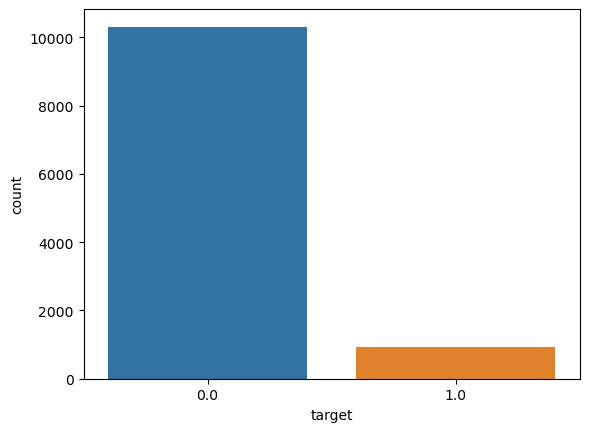

In [33]:
sns.countplot(x='target',data=df);

In [34]:
print(len(df[df['target']==1])/len(df.index)*100)

8.157449461216492


- Here Data is imbalanced as % of being pulsar star is only about 9% so, we need to apply sampling method to balance the dataset

- We will also create the model without applying any sampling method so, that wecan evalute the better result

In [35]:
# Split the Data to create train and test data
X = df.drop(columns = 'target',axis=1)
y = df['target']

In [36]:
# Import the libraries for SMOTE and fit the X and y to resample the data

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

df_1 = pd.concat([y_smote, x_smote], axis=1)

Original dataset shape Counter({0.0: 10313, 1.0: 916})
Resample dataset shape Counter({0.0: 10313, 1.0: 10313})


In [38]:
# split for normal sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.30)

In [39]:
# split for SMOTE sample
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, random_state=100, test_size=0.30)

In [40]:
# Let's Directly create the list for train set so, that we can directly run all samples in one go!!
X_train_list = [X_train, X_train1]
y_train_list = [y_train, y_train1]

In [41]:
# Giving Name to both Sample
data_desc = ['orignal','Smote_resample']

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 

---------------------------------------------------------------------------
Model with training data-0 (orignal):

Model accuracy score: 0.9798
Classification report:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3091
         1.0       0.95      0.80      0.87       278

    accuracy                           0.98      3369
   macro avg       0.97      0.90      0.93      3369
weighted avg       0.98      0.98      0.98      3369

Confusion Matrix:


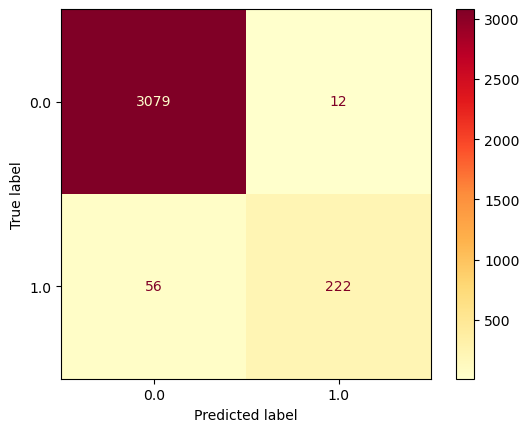

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Smote_resample):

Model accuracy score: 0.9688
Classification report:

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3091
         1.0       0.77      0.89      0.83       278

    accuracy                           0.97      3369
   macro avg       0.88      0.93      0.90      3369
weighted avg       0.97      0.97      0.97      3369

Confusion Matrix:


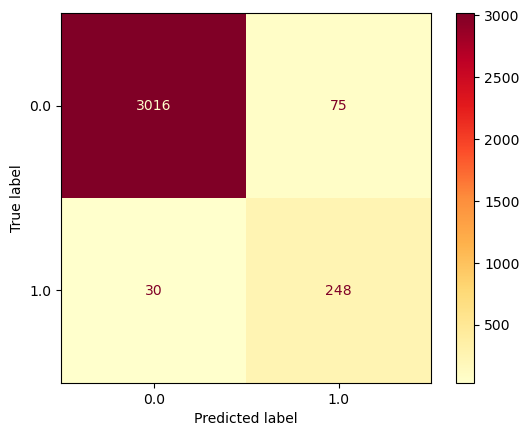

---------------------------------------------------------------------------


In [43]:
# Creating For loop to create model for SVC and evaluate with metrics for both sample

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_svc = SVC(kernel='linear')
    clf_svc.fit(X_train_list[i], y_train_list[i])
    pred = clf_svc.predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")


# Conclusion

#### As per the Above result we have rightly resample the Data using SMOTE because, recall value has increased significantly.
#### And as Recall is higher than Precision in SMOTE sample which also an good sign of model.
#### Accuracy score also is good of 0.968

## Overall Model has good prediction performance